# Module - 5

Random Forest Classifier

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('churn.csv')
data.head()

,Customer ID,Gender,Age,Zip Code,Latitude,Longitude,Tenure in Months,Offer,Internet Type,Avg Monthly GB Download,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,93225,34.827662,-118.999073,9,None,Cable,16.0,Yes,One Year,Credit Card,65.6,593.30,0,974.81,Stayed
1,0003-MKNFE,Male,46,91206,34.162515,-118.203869,9,None,Cable,10.0,No,Month-to-Month,Credit Card,-4.0,542.40,10,610.28,Stayed
2,0004-TLHLJ,Male,50,92627,33.645672,-117.922613,4,Offer E,Fiber Optic,30.0,Yes,Month-to-Month,Bank Withdrawal,73.9,280.85,0,415.45,Churned
3,0011-IGKFF,Male,78,94553,38.014457,-122.115432,13,Offer D,Fiber Optic,4.0,Yes,Month-to-Month,Bank Withdrawal,98.0,1237.85,0,1599.51,Churned
4,0013-EXCHZ,Female,75,93010,34.227846,-119.079903,3,None,Fiber Optic,11.0,Yes,Month-to-Month,Credit Card,83.9,267.40,0,289.54,Churned


In [4]:
del data['Customer ID']
del data['Zip Code']
del data['Latitude']
del data['Longitude']

In [5]:
df=data.dropna()

In [6]:
df.drop(df.index[df['Customer Status'] == 'Joined'], inplace=True)

In [7]:
df = df.rename({'Tenure in Months': 'Tenure_in_Months', 'Internet Service': 'Internet_Service',
                'Internet Type': 'Internet_Type', 'Avg Monthly GB Download': 'Avg_Monthly_GB_Download',
                'Unlimited Data': 'Unlimited_Data', 'Payment Method': 'Payment_Method',
                'Monthly Charge': 'Monthly_Charge', 'Total Charges': 'Total_Charges',
                'Total Extra Data Charges': 'Total_Extra_Data_Charges', 'Customer Status': 'Customer_Status', 'Total Revenue':'Total_Revenue'}, axis=1)

In [8]:
df.columns

Index(['Gender', 'Age', 'Tenure_in_Months', 'Offer', 'Internet_Type',
       'Avg_Monthly_GB_Download', 'Unlimited_Data', 'Contract',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges',
       'Total_Extra_Data_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Offer', 'Internet_Type', 'Unlimited_Data', 'Contract', 'Payment_Method', 'Customer_Status','Gender']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [10]:
df.tail()

,Gender,Age,Tenure_in_Months,Offer,Internet_Type,Avg_Monthly_GB_Download,Unlimited_Data,Contract,Payment_Method,Monthly_Charge,Total_Charges,Total_Extra_Data_Charges,Total_Revenue,Customer_Status
7036,0,53,1,5,2,9.0,1,0,1,70.15,70.15,0,112.24,0
7038,0,20,13,4,1,59.0,1,1,1,55.15,742.90,0,1349.74,1
7039,1,40,22,4,2,17.0,1,0,0,85.10,1873.70,0,2230.10,0
7041,1,21,67,1,0,58.0,1,2,1,67.85,4627.65,0,4769.69,1
7042,1,36,63,0,0,5.0,1,2,0,59.00,3707.60,0,3707.60,1


In [11]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Customer_Status', axis=1)
#Response variable
y = df.loc[:,'Customer_Status']

In [12]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros =RandomUnderSampler()
x_ros,y_ros=ros.fit_resample(X,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({1: 3489, 0: 1756})
OVER SAMPLING DATA COUNT  :  Counter({0: 1756, 1: 1756})


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(X_train))
print("Number of test dataset     : ", len(X_test))
print("Total number of dataset    : ", len(X_train)+len(X_test))

Number of training dataset :  2458
Number of test dataset     :  1054
Total number of dataset    :  3512


K Nearest Neighbor

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training Process

In [15]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predicted_rfc = rfc.predict(X_test)

Getting Accuracy

In [16]:
accuracy = accuracy_score(y_test,predicted_rfc)
print('Accuracy of Random Forest Classifier is: ',accuracy*100)

Accuracy of Random Forest Classifier is:  78.55787476280834


Finding Classification Report

In [17]:
cr = classification_report(y_test,predicted_rfc)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       527
           1       0.78      0.80      0.79       527

    accuracy                           0.79      1054
   macro avg       0.79      0.79      0.79      1054
weighted avg       0.79      0.79      0.79      1054



Finding Confusion Matrix

In [18]:
cm = confusion_matrix(y_test,predicted_rfc)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[407 120]
 [106 421]]


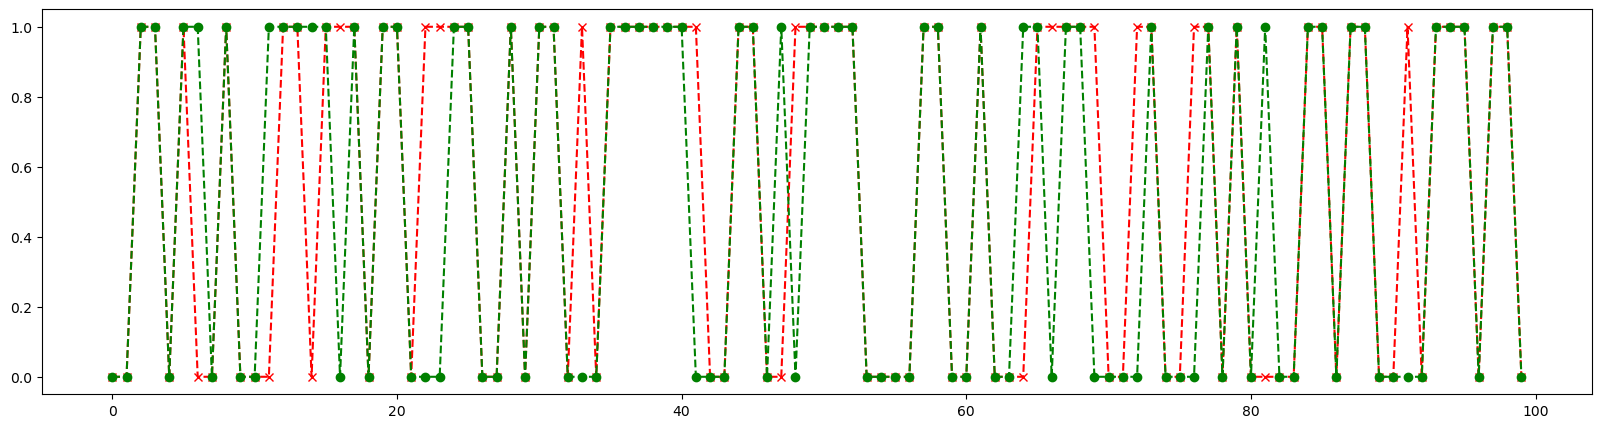

In [19]:
DF = p.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_rfc
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

Saving Model

In [20]:
import joblib
joblib.dump(rfc,'RFC.pkl')

['RFC.pkl']